## 第04天：掌握Opencv基础模块（1）
- 腐蚀
- 膨胀
- 开闭运算
- 梯度计算
- 礼帽和黑帽

## 第04天：掌握Opencv基础模块（2）
- 梯度计算方法
- Soble算子
- scharr算子
- lapkacian算子

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('dige.png')
def cv_show(*img_path):
    res = np.hstack(img_path)
    cv2.imshow('img', res)
    cv2.waitKey(0)    
    cv2.destroyAllWindows() 
def plt_show(*args):
    for i in range(len(args)):
        plt.subplot(231+i), plt.imshow(args[i])

### 腐蚀

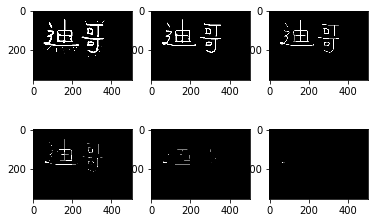

In [23]:
kernel = np.ones((3,3),np.uint8) 
num=[0,0,0,0,0,0]
for i in range(6):
    num[i] = cv2.erode(img,kernel,iterations = i)
plt_show(num[0],num[1],num[2],num[3],num[4],num[5])



### 膨胀

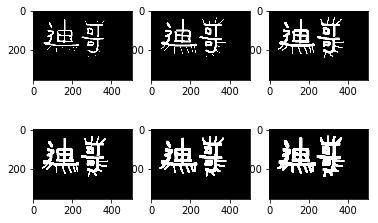

In [29]:
kernel = np.ones((3,3),np.uint8) 
num=[0,0,0,0,0,0]
for i in range(6):
    num[i] = cv2.dilate(img,kernel,iterations = i)
plt_show(num[0],num[1],num[2],num[3],num[4],num[5])

### 开运算和闭运算
- 开运算：先腐蚀，后膨胀
- 闭运算：先膨胀，后腐蚀

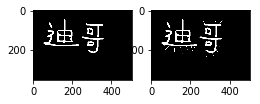

In [30]:
kernel = np.ones((5,5),np.uint8) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt_show(opening,closing)

### 梯度运算
梯度=膨胀-腐蚀

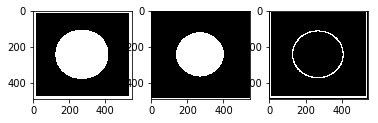

In [35]:
pie = cv2.imread('pie.png')
kernel = np.ones((7,7),np.uint8) 
dilate = cv2.dilate(pie,kernel,iterations = 2)
erosion = cv2.erode(pie,kernel,iterations = 2)

gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

plt_show(dilate,erosion,gradient)

### 礼帽与黑帽
- 礼帽 = 原始输入-开运算结果(取'刺')
- 黑帽 = 闭运算-原始输入(取'整体')

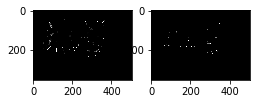

In [38]:
img = cv2.imread('dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

blackhat  = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)

plt_show(tophat,blackhat)

### 图像梯度-Sobel算子
dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
- ddepth:图像的深度
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小
白到黑是正数，黑到白就是负数了，所有的负数会被截断成0，所以要取绝对值

![title](sobel_1.png)


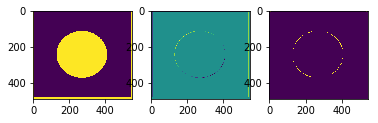

In [73]:
img = cv2.imread('pie.png',cv2.IMREAD_GRAYSCALE)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx2 = cv2.convertScaleAbs(sobelx)
cv_show(img,sobelx,sobelx2)

sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely2 = cv2.convertScaleAbs(sobely)  
cv_show(img,sobely,sobely2)

sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
sobelxy2 = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy2 = cv2.convertScaleAbs(sobelxy2)
cv_show(img,sobelxy,sobelxy2)
plt_show(img,sobelxy,sobelxy2)


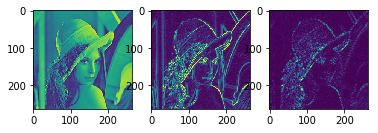

In [9]:
img = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)


sobelxy2 = cv2.Sobel(img,cv2.CV_64F,1,1,ksize=3)
sobelxy2 = cv2.convertScaleAbs(sobelxy2)
cv_show(img,sobelxy,sobelxy2)
plt_show(img,sobelxy,sobelxy2)

### 图像梯度-Scharr算子
![title](scharr.png)

### 图像梯度-laplacian算子
![title](l.png)

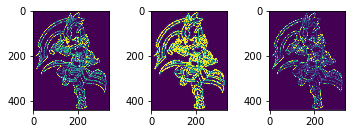

In [13]:
img = cv2.imread('AM.png',cv2.IMREAD_GRAYSCALE)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
sobelx = cv2.convertScaleAbs(sobelx)   
sobely = cv2.convertScaleAbs(sobely)  
sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
scharrx = cv2.convertScaleAbs(scharrx)   
scharry = cv2.convertScaleAbs(scharry)  
scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)   


cv_show(sobelxy,scharrxy,laplacian)
plt_show(sobelxy,scharrxy,laplacian)

In [6]:
def sobel_scharr_laplacian(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    sobelx = cv2.convertScaleAbs(sobelx)   
    sobely = cv2.convertScaleAbs(sobely)  
    sobelxy =  cv2.addWeighted(sobelx,0.5,sobely,0.5,0)  

    scharrx = cv2.Scharr(img,cv2.CV_64F,1,0)
    scharry = cv2.Scharr(img,cv2.CV_64F,0,1)
    scharrx = cv2.convertScaleAbs(scharrx)   
    scharry = cv2.convertScaleAbs(scharry)  
    scharrxy =  cv2.addWeighted(scharrx,0.5,scharry,0.5,0) 

    laplacian = cv2.Laplacian(img,cv2.CV_64F)
    laplacian = cv2.convertScaleAbs(laplacian)   


    cv_show(img,sobelxy,scharrxy,laplacian)

In [8]:
sobel_scharr_laplacian('test.jpg')